In [8]:
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt

In [9]:
df = pd.read_csv("users/user01f2/sample_ex.csv")

In [10]:
lx =pd.DataFrame(df.loc[:, ["Left_x", "time_stamp"]])
# lx =pd.DataFrame(df.iloc[:,[0,8]])

In [11]:
lx

,Left_x,time_stamp
0,NaN,10:58:13.459062
1,NaN,10:58:13.485989
2,NaN,10:58:13.516424
3,NaN,10:58:13.545343
4,NaN,10:58:13.561300
...,...,...
259333,NaN,12:10:19.570400
259334,NaN,12:10:19.586350
259335,NaN,12:10:19.603301
259336,NaN,12:10:19.620288


In [68]:
arr = [0]*lx.shape[0]
for i in range(lx.shape[0]):
    arr[i] = pd.to_datetime(lx.iloc[i, 1]).timestamp()
    


In [84]:
u = [0.0]*lx.shape[0]
for i in range(lx.shape[0]):
    u[i] = arr[i] - arr[0]

In [85]:
# # ここからサンプルとなる波形の作成-------------
# # スムース関数
# def smooth(x):
#     a = 30
#     y = np.tanh(x) / (1 + a * np.exp(- x))
#     return y
 
# A = 1    # 振幅
# t0 = 0   # 初期時間[s]
# tf = 10  # 終了時間[s]
# dt = 0.2 # 時間刻み[s]
# f = 1    # 周波数[Hz}
# t = np.arange(t0, tf + dt, dt)  # 時間軸
 
# # 滑らかに振幅増加する正弦波
# y = smooth(t) * A * np.sin(2 * np.pi * f * t)
# # ここまでサンプルとなる波形の作成-------------
 
# 補間関数fを作成
f = interpolate.interp1d(u, lx["Left_x"], kind='linear',fill_value="extrapolate")
 
# # 補間した結果からリサンプリング波形を生成
# num = 10000
# t_resample = np.linspace(t0, tf, num)
# y_resample = f(t_resample)              # f(t)

In [86]:
# u = arr

# u = [0.0]*lx.shape[0]
# for i in range(lx.shape[0]):
#     u[i] = arr[i] - arr[0]

In [87]:
# u

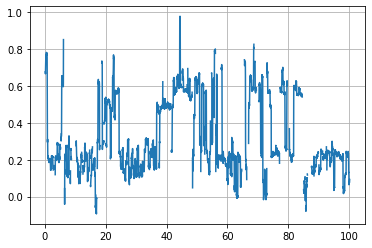

In [89]:
plt.plot(u[0:6000], f(u[0:6000]),'-')
plt.grid(True)


In [90]:
u[0:10]

[0.0,
 0.02692699432373047,
 0.05736184120178223,
 0.08628082275390625,
 0.10223793983459473,
 0.11919283866882324,
 0.1371448040008545,
 0.15310382843017578,
 0.170058012008667,
 0.1870119571685791]

In [91]:
lx.iloc[0:10,1]

0    10:58:13.459062
1    10:58:13.485989
2    10:58:13.516424
3    10:58:13.545343
4    10:58:13.561300
5    10:58:13.578255
6    10:58:13.596207
7    10:58:13.612166
8    10:58:13.629120
9    10:58:13.646074
Name: time_stamp, dtype: object

In [92]:
len(u)

259338

In [93]:
pd.to_datetime(lx.iloc[9,1]).timestamp()

1608721093.646074

In [94]:
int(pd.to_datetime(lx.iloc[-1,1]).timestamp()) - int(pd.to_datetime(lx.iloc[0,1]).timestamp())

4326

In [102]:
num = 4327*5
t_resample = np.linspace(int(pd.to_datetime(lx.iloc[0,1]).timestamp()) - int(pd.to_datetime(lx.iloc[0,1]).timestamp()), 
                         int(pd.to_datetime(lx.iloc[-1,1]).timestamp()) - int(pd.to_datetime(lx.iloc[0,1]).timestamp()), 
                         num)
y_resample = f(t_resample)

In [1]:
# for i in range(num):
#     print(t_resample[i])
#     print(y_resample[i])

In [104]:
t = [0]*num
for i in range(num):
    t[i] = (t_resample[i]) - (t_resample[0])

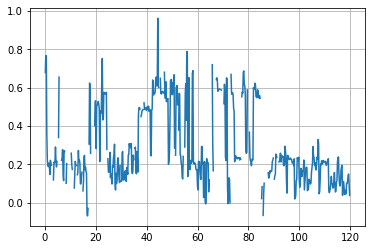

In [106]:
plt.plot(t[:600], y_resample[:600],'-')
plt.grid(True)

In [107]:
t[0:30]

[0.0,
 0.19996302117037995,
 0.3999260423407599,
 0.5998890635111398,
 0.7998520846815198,
 0.9998151058518998,
 1.1997781270222796,
 1.3997411481926596,
 1.5997041693630396,
 1.7996671905334196,
 1.9996302117037996,
 2.1995932328741796,
 2.399556254044559,
 2.599519275214939,
 2.799482296385319,
 2.999445317555699,
 3.199408338726079,
 3.399371359896459,
 3.5993343810668392,
 3.7992974022372192,
 3.9992604234075992,
 4.199223444577979,
 4.399186465748359,
 4.599149486918739,
 4.799112508089118,
 4.999075529259499,
 5.199038550429878,
 5.399001571600259,
 5.598964592770638,
 5.798927613941019]

In [108]:
import datetime
datetime.datetime.fromtimestamp(pd.to_datetime(lx.iloc[9,1]).timestamp())

datetime.datetime(2020, 12, 23, 19, 58, 13, 646074)

In [109]:
arr2 = [0.0]*lx.shape[0]
for i in range(lx.shape[0]):
    arr2[i] = arr[i] - arr[0]

In [110]:
arr2[0:30]

[0.0,
 0.02692699432373047,
 0.05736184120178223,
 0.08628082275390625,
 0.10223793983459473,
 0.11919283866882324,
 0.1371448040008545,
 0.15310382843017578,
 0.170058012008667,
 0.1870119571685791,
 0.20296883583068848,
 0.2199249267578125,
 0.2368779182434082,
 0.2528369426727295,
 0.27078700065612793,
 0.2867448329925537,
 0.30369997024536133,
 0.3216519355773926,
 0.3475840091705322,
 0.3585548400878906,
 0.3745098114013672,
 0.38647890090942383,
 0.40842199325561523,
 0.44343090057373047,
 0.4643828868865967,
 0.495297908782959,
 0.5157628059387207,
 0.537700891494751,
 0.5562689304351807,
 0.5811758041381836]

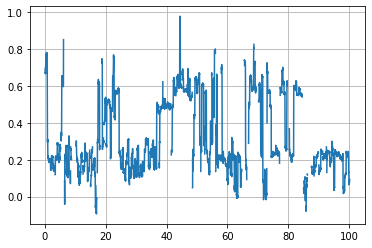

In [111]:
plt.plot(arr2[0:6000], lx.iloc[0:6000, 0], '-')
plt.grid(True)